<a href="https://colab.research.google.com/github/Prashikdhole/Kyphosis-Project/blob/main/Kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn import tree


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/kyphosis.csv')


In [ ]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [ ]:
df.tail(10)

,Kyphosis,Age,Number,Start
71,absent,127,4,12
72,absent,87,4,16
73,absent,206,4,10
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
df.shape

(81, 4)

In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [ ]:
df[df.duplicated()]

,Kyphosis,Age,Number,Start


In [ ]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<Axes: title={'center': 'Percentage of vertebrae present'}, ylabel='Kyphosis'>

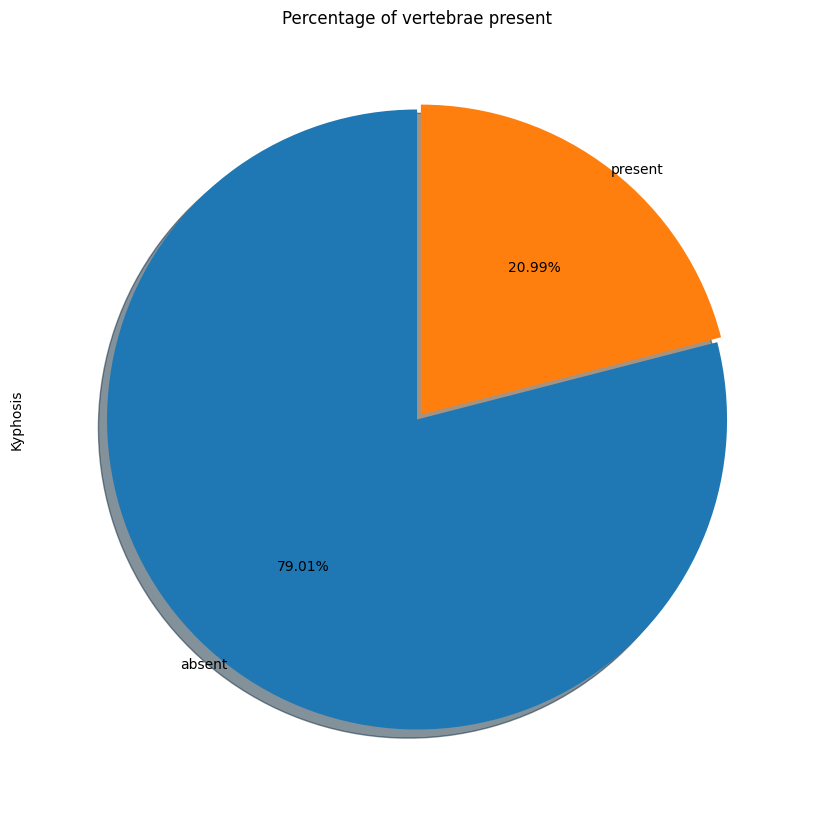

In [ ]:
df.Kyphosis.value_counts().plot(kind='pie',figsize=(10,20),title='Percentage of vertebrae present',autopct='%1.2f%%',startangle=90,shadow=True,labeldistance=1,explode=[0,0.02])

<Axes: >

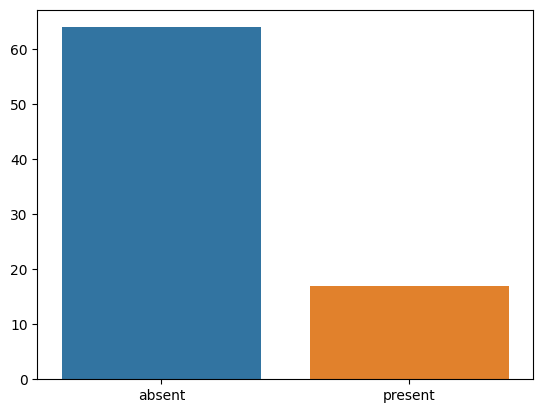

In [ ]:
vc = df.Kyphosis.value_counts()
sns.barplot(x = vc.index,y=vc.values)

In [ ]:
df.Age.unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36])

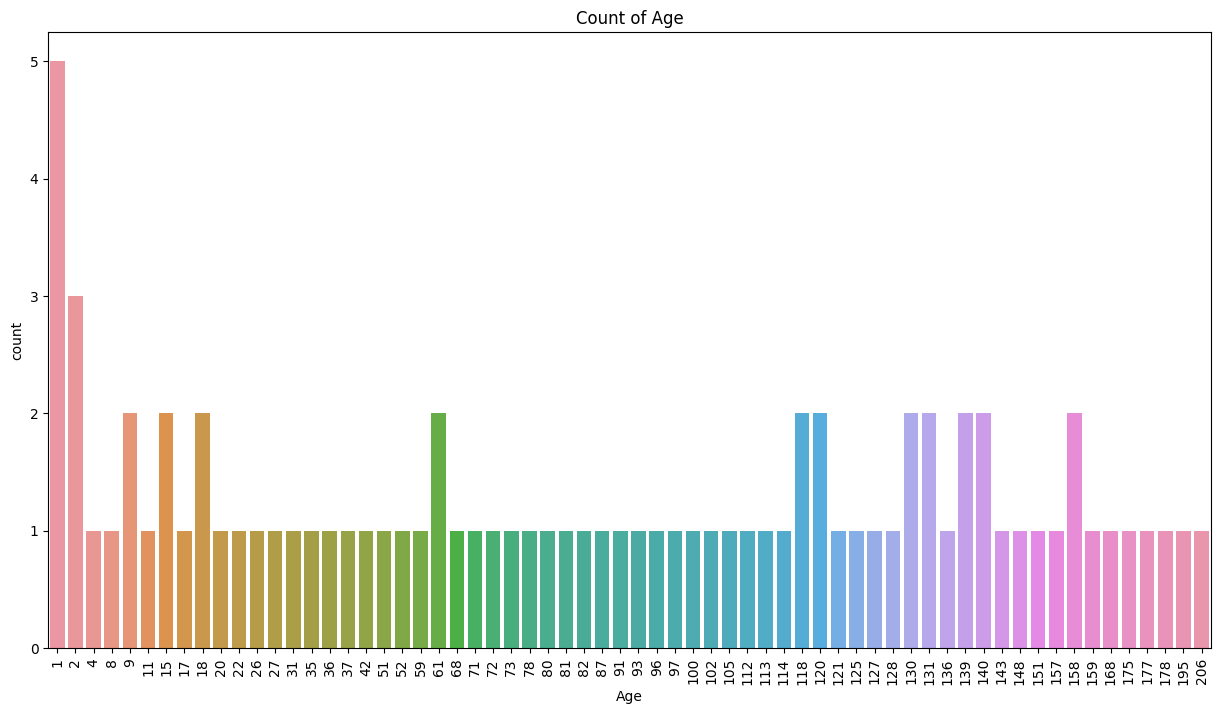

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='Age')
plt.title('Count of Age')
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-f8a66a75c64f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number'],color = "y")


<Axes: xlabel='Number', ylabel='Density'>

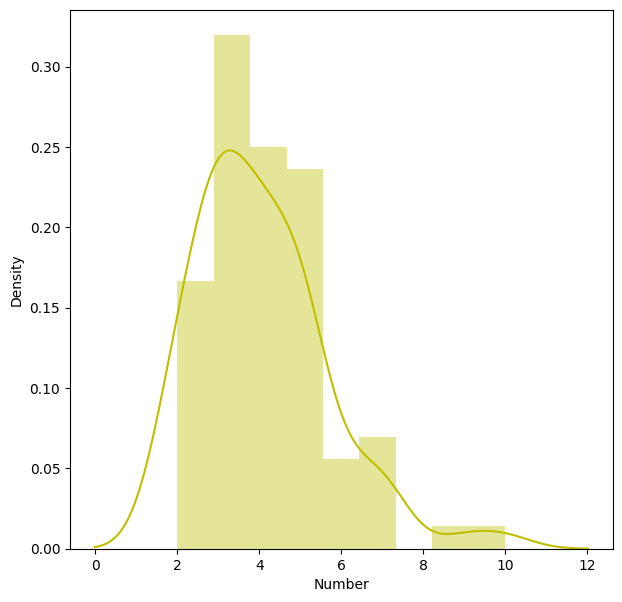

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Number'],color = "y")

<ipython-input-17-efd64347ee0e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Start'],color = "y")


<Axes: xlabel='Start', ylabel='Density'>

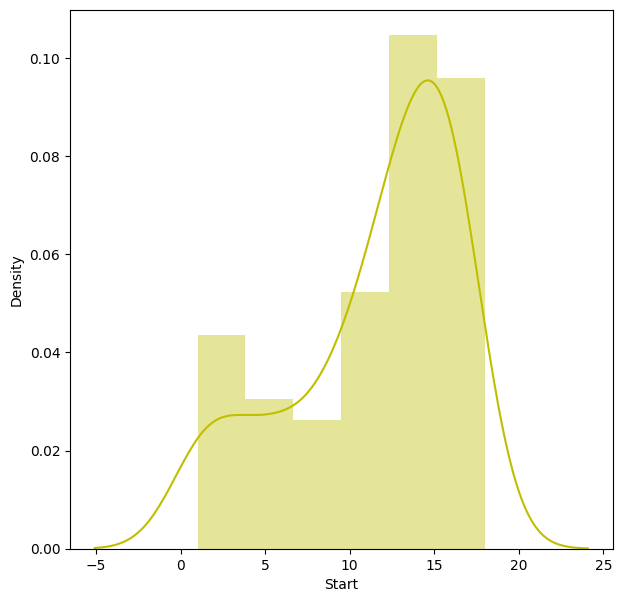

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['Start'],color = "y")

<ipython-input-18-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

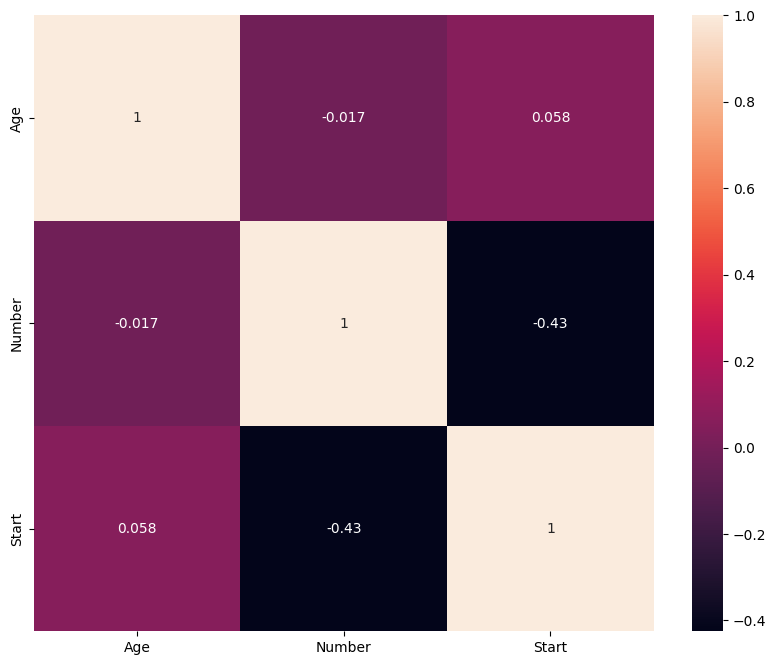

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X= df.drop('Kyphosis',axis=1)
Y = df['Kyphosis']

In [ ]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(X,Y)

In [ ]:
balanced_Kyphosis = pd.concat([x_resampled, y_resampled], axis=1)
balanced_Kyphosis.to_csv('balanced_kyphosis_data.csv', index=False)

In [ ]:
df2 = pd.read_csv('balanced_kyphosis_data.csv')
df2.head(10)

,Age,Number,Start,Kyphosis
0,71,3,5,absent
1,158,3,14,absent
2,128,4,5,present
3,2,5,1,absent
4,1,4,15,absent
5,1,2,16,absent
6,61,2,17,absent
7,37,3,16,absent
8,113,2,16,absent
9,59,6,12,present


In [ ]:
df2.describe()

,Age,Number,Start
count,128.000000,128.000000,128.000000
mean,89.320312,4.273438,9.671875
std,50.495331,1.472663,5.072870
min,1.000000,2.000000,1.000000
25%,53.500000,3.000000,5.000000
50%,92.500000,4.000000,11.000000
75%,129.000000,5.000000,14.000000
max,206.000000,10.000000,18.000000


<Axes: >

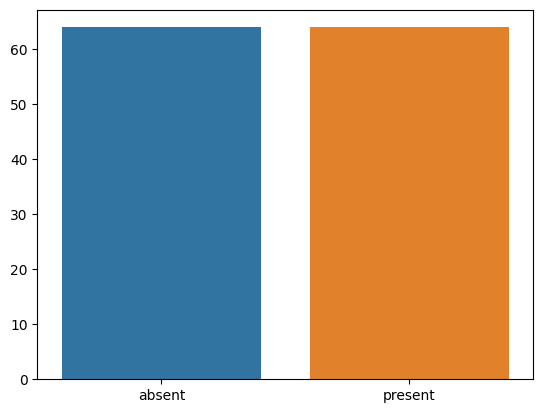

In [ ]:
balance_visualize = df2.Kyphosis.value_counts()
sns.barplot(x = balance_visualize.index,y=balance_visualize.values)

In [ ]:
x = df2.drop('Kyphosis',axis=1)
y = df2['Kyphosis']

In [ ]:
x_np = x.to_numpy()
y_np = y.to_numpy()

In [ ]:
y = y.apply(lambda x:1 if x=='Present' else 0)
y_np = np.where(y_np =='present',1,0)

In [ ]:
x_np

array([[ 71,   3,   5],
       [158,   3,  14],
       [128,   4,   5],
       [  2,   5,   1],
       [  1,   4,  15],
       [  1,   2,  16],
       [ 61,   2,  17],
       [ 37,   3,  16],
       [113,   2,  16],
       [ 59,   6,  12],
       [ 82,   5,  14],
       [148,   3,  16],
       [ 18,   5,   2],
       [  1,   4,  12],
       [168,   3,  18],
       [  1,   3,  16],
       [ 78,   6,  15],
       [175,   5,  13],
       [ 80,   5,  16],
       [ 27,   4,   9],
       [ 22,   2,  16],
       [105,   6,   5],
       [ 96,   3,  12],
       [131,   2,   3],
       [ 15,   7,   2],
       [  9,   5,  13],
       [  8,   3,   6],
       [100,   3,  14],
       [  4,   3,  16],
       [151,   2,  16],
       [ 31,   3,  16],
       [125,   2,  11],
       [130,   5,  13],
       [112,   3,  16],
       [140,   5,  11],
       [ 93,   3,  16],
       [  1,   3,   9],
       [ 52,   5,   6],
       [ 20,   6,   9],
       [ 91,   5,  12],
       [ 73,   5,   1],
       [ 35,   3

In [ ]:
y_np

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_np,y_np, test_size = 0.3,stratify = y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(89, 3)
(39, 3)
(89,)
(39,)


In [ ]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
x_train_mm = min_max_scaler.fit_transform(x_train)
x_test_mm = min_max_scaler.fit_transform(x_test)

In [ ]:
x_train_std =standard_scaler.fit_transform(x_train)
x_test_std =standard_scaler.fit_transform(x_test)

**Logistic Regression**

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(x_train_std,y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
lr.coef_

array([[ 0.50678154,  0.46260411, -1.10659393]])

In [ ]:
lr.intercept_

array([-0.16694638])

In [ ]:
train_preds = lr.predict_proba(x_train_std)
test_preds = lr.predict_proba(x_test_std)

In [ ]:
test_preds

array([[0.27463772, 0.72536228],
       [0.53987235, 0.46012765],
       [0.58648571, 0.41351429],
       [0.74239398, 0.25760602],
       [0.52979212, 0.47020788],
       [0.8650986 , 0.1349014 ],
       [0.50168778, 0.49831222],
       [0.77548814, 0.22451186],
       [0.85991141, 0.14008859],
       [0.33054431, 0.66945569],
       [0.20463816, 0.79536184],
       [0.82799397, 0.17200603],
       [0.70362554, 0.29637446],
       [0.26821228, 0.73178772],
       [0.75537572, 0.24462428],
       [0.48895451, 0.51104549],
       [0.9442208 , 0.0557792 ],
       [0.96793956, 0.03206044],
       [0.78623603, 0.21376397],
       [0.86508522, 0.13491478],
       [0.37874401, 0.62125599],
       [0.10886568, 0.89113432],
       [0.69015959, 0.30984041],
       [0.26675752, 0.73324248],
       [0.65293509, 0.34706491],
       [0.17678288, 0.82321712],
       [0.16950729, 0.83049271],
       [0.16089659, 0.83910341],
       [0.23347919, 0.76652081],
       [0.54156695, 0.45843305],
       [0.

In [ ]:
train_preds

array([[0.55787613, 0.44212387],
       [0.14183957, 0.85816043],
       [0.94506423, 0.05493577],
       [0.26838123, 0.73161877],
       [0.03671029, 0.96328971],
       [0.53990256, 0.46009744],
       [0.78908463, 0.21091537],
       [0.42792842, 0.57207158],
       [0.15001783, 0.84998217],
       [0.19041674, 0.80958326],
       [0.74017038, 0.25982962],
       [0.26552931, 0.73447069],
       [0.78328445, 0.21671555],
       [0.17564258, 0.82435742],
       [0.8865378 , 0.1134622 ],
       [0.53261598, 0.46738402],
       [0.85332911, 0.14667089],
       [0.22079834, 0.77920166],
       [0.5761936 , 0.4238064 ],
       [0.14055279, 0.85944721],
       [0.2591022 , 0.7408978 ],
       [0.48376675, 0.51623325],
       [0.5607168 , 0.4392832 ],
       [0.91031921, 0.08968079],
       [0.60306496, 0.39693504],
       [0.72310765, 0.27689235],
       [0.95889907, 0.04110093],
       [0.821996  , 0.178004  ],
       [0.65763948, 0.34236052],
       [0.24376294, 0.75623706],
       [0.

In [ ]:
train_class_preds = lr.predict(x_train_std)
test_class_pred = lr.predict(x_test_std)

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

In [ ]:
train_accuracy

0.7191011235955056

In [ ]:
test_accuracy

0.8205128205128205

[[37 10]
 [15 27]]


[Text(0, 0.5, 'Present'), Text(0, 1.5, 'absent')]

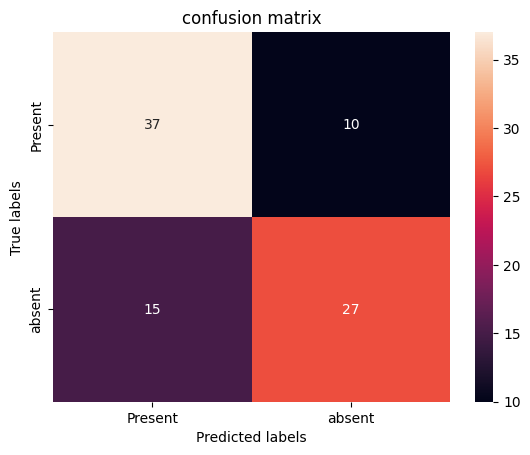

In [ ]:
labels = ['Present','absent']
cm = confusion_matrix(y_train,train_class_preds)
print(cm)


ax = plt.subplot()
sns.heatmap(cm,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[16  1]
 [ 6 16]]


[Text(0, 0.5, 'Present'), Text(0, 1.5, 'absent')]

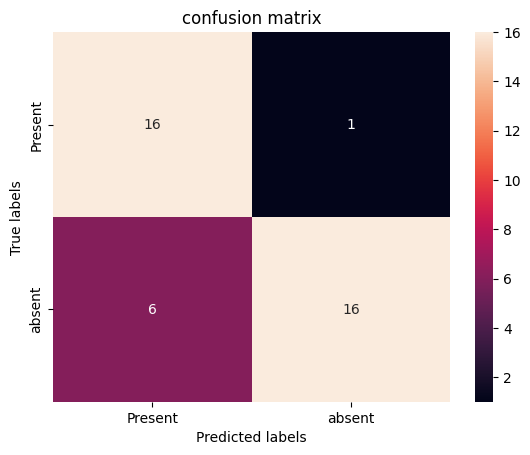

In [ ]:
labels = ['Present','absent']
cm = confusion_matrix(y_test,test_class_pred)
print(cm)


ax = plt.subplot()
sns.heatmap(cm,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Naive Bayes Classifier**

In [ ]:
nb = GaussianNB().fit(x_train_mm,y_train)

In [ ]:
train_pred = nb.predict(x_train_mm)
test_pred = nb.predict(x_test_mm)

In [ ]:
train_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0])

In [ ]:
test_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
accuracy_score(nb.predict(x_test_mm), y_test)

0.8974358974358975

**SVM**

In [ ]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',gamma=0.2, C=1.0)
svm.fit(x_train_mm,y_train)

SVC(gamma=0.2)

In [ ]:
svm.support_vectors_

array([[0.69268293, 0.875     , 0.11764706],
       [0.34634146, 0.375     , 0.82352941],
       [0.34146341, 0.125     , 0.23529412],
       [0.07804878, 0.25      , 0.52941176],
       [0.63414634, 0.        , 0.11764706],
       [0.        , 0.125     , 0.47058824],
       [0.54146341, 0.125     , 0.88235294],
       [0.62926829, 0.375     , 0.70588235],
       [0.08292683, 0.375     , 0.05882353],
       [0.32682927, 0.375     , 0.52941176],
       [0.61463415, 0.25      , 0.64705882],
       [0.67804878, 0.25      , 0.82352941],
       [0.17073171, 0.25      , 0.70588235],
       [0.09268293, 0.5       , 0.47058824],
       [0.76585366, 0.125     , 0.76470588],
       [0.24390244, 0.625     , 0.47058824],
       [0.        , 0.25      , 0.64705882],
       [0.00487805, 0.125     , 0.70588235],
       [0.76585366, 0.375     , 0.76470588],
       [0.3902439 , 0.25      , 0.        ],
       [0.03414634, 0.125     , 0.29411765],
       [0.38536585, 0.375     , 0.88235294],
       [0.

In [ ]:
accuracy_score(svm.predict(x_test_mm), y_test)

0.8461538461538461

**Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 4)
dtc.fit(x_train_mm,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
params = {'max_leaf_nodes':list(range(2,100)),'max_depth':[4,5,6],'min_samples_split':[2,3,4]}
grid_cv = GridSearchCV(DecisionTreeClassifier(random_state = 0), params,verbose=1,cv=3)
grid_cv.fit(x_train_mm, y_train)

Fitting 3 folds for each of 882 candidates, totalling 2646 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_cv.best_params_

{'max_depth': 6, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [ ]:
best_dtc = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 7, min_samples_split = 2,max_depth = 6, random_state = 0)
best_dtc.fit(x_train_mm,y_train)
y_predict = best_dtc.predict(x_test_mm)

In [ ]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
accuracy_score(y_test,y_predict)*100

82.05128205128204

[Text(0.6, 0.9285714285714286, 'x[2] <= 0.676\ngini = 0.498\nsamples = 89\nvalue = [47, 42]'),
 Text(0.4, 0.7857142857142857, 'x[0] <= 0.127\ngini = 0.414\nsamples = 58\nvalue = [17, 41]'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.6428571428571429, 'x[0] <= 0.69\ngini = 0.315\nsamples = 51\nvalue = [10, 41]'),
 Text(0.4, 0.5, 'x[1] <= 0.062\ngini = 0.273\nsamples = 49\nvalue = [8, 41]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.35714285714285715, 'x[0] <= 0.412\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.4, 0.21428571428571427, 'x[1] <= 0.312\ngini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.07142857142857142, 'gini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.8, 0.21428571428571427, 'gini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),


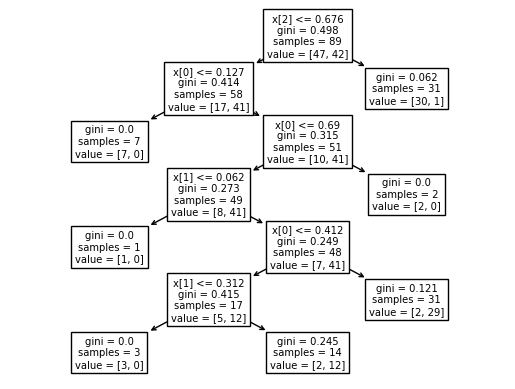

In [ ]:
tree.plot_tree(best_dtc)

**Random Forest Model**

In [ ]:
n_estimators = [10,50,100,150,200]

max_depth = list(range(2,12))



param_dict = {'n_estimators':n_estimators,
              'max_depth':max_depth
              }

In [ ]:
param_dict

{'n_estimators': [10, 50, 100, 150, 200],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [ ]:
rf_model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 10, verbose=2, scoring='accuracy')

rf_grid.fit(x_train_std,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=2, n

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 2, 'n_estimators': 10}

In [ ]:
best_rf_model = RandomForestClassifier(max_depth=2,n_estimators = 10)
best_rf_model.fit(x_train_std,y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [ ]:
y_pred_train = best_rf_model.predict(x_train_std)
y_pred_test = best_rf_model.predict(x_test_std)



In [ ]:
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)

In [ ]:
train_accuracy

0.9213483146067416

In [ ]:
test_accuracy

0.8717948717948718

In [ ]:
test_cm = confusion_matrix(y_test,y_pred_test)

In [ ]:
test_cm

array([[17,  0],
       [ 5, 17]])

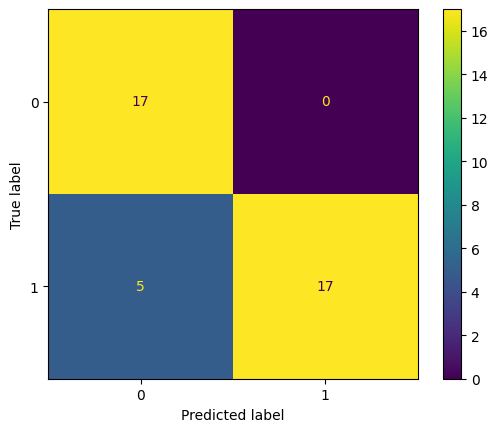

In [ ]:
disp= ConfusionMatrixDisplay(test_cm)
disp.plot()